C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\victo\AppData\Local\Temp\ipykernel_8020\1757674267.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[y_kmeans==i, 0], X.iloc[y_kmeans==i, 1], c=colors[i], s=50, cmap='viridis', label=labels[i])


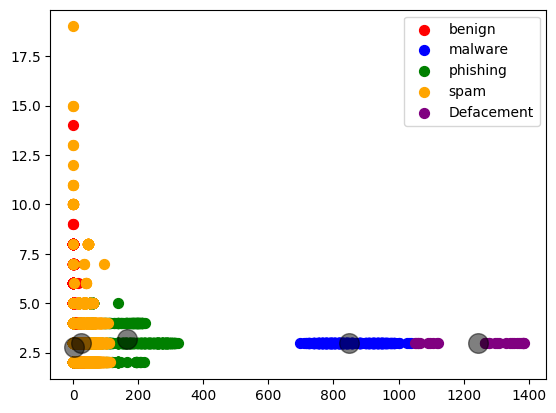

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\victo\AppData\Local\Temp\ipykernel_8020\1757674267.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[y_kmeans==i, 0], X_scaled[y_kmeans==i, 1], c=colors[i], s=50, cmap='viridis', label=labels[i])


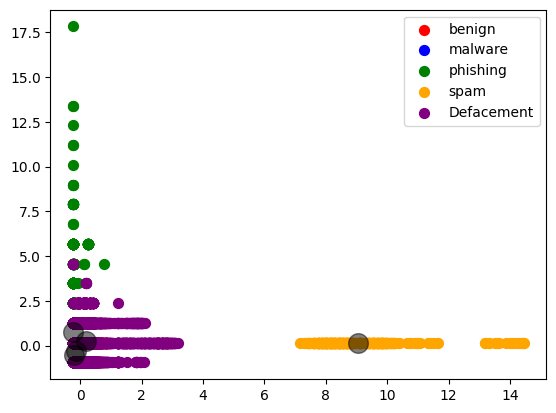

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import All.csv
#import All csv
df_All = pd.read_csv('FinalDataset/All.csv')
#print(df_All.info())
#print different type of URL_Type_obf_Type
#print(df_All['URL_Type_obf_Type'].value_counts())
""" Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698 """

#change different type of URL_Type_obf_Type to 0,1,2,3,4
df_All["URL_Type_obf_Type"] = df_All["URL_Type_obf_Type"].replace(['benign'], 0)
df_All["URL_Type_obf_Type"] = df_All["URL_Type_obf_Type"].replace(['malware'], 1)
df_All["URL_Type_obf_Type"] = df_All["URL_Type_obf_Type"].replace(['phishing'], 2)
df_All["URL_Type_obf_Type"] = df_All["URL_Type_obf_Type"].replace(['spam'], 3)
df_All["URL_Type_obf_Type"] = df_All["URL_Type_obf_Type"].replace(['Defacement'], 4)
#change NaN value by O
df_All.fillna(0, inplace=True)
#compter le nombre de ligne contenant NaN
#print(df_All.isnull().sum().head(30))
#drop infinit value
df_All=df_All.replace([np.inf, -np.inf], np.nan)
df_All.dropna(inplace = True)
df_All.fillna(0, inplace=True)
# Remplacer les valeurs manquantes par la moyenne
#df_All.fillna(df_All.mean(), inplace=True)
#print(df_All.info())
#add pca


# X and y
X = df_All.drop('URL_Type_obf_Type', axis=1)
y = df_All['URL_Type_obf_Type']

#plot clustering result
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1).fit(X)
y_kmeans = kmeans.predict(X)
colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['benign', 'malware', 'phishing', 'spam', 'Defacement']
for i in range(5):
    plt.scatter(X.iloc[y_kmeans==i, 0], X.iloc[y_kmeans==i, 1], c=colors[i], s=50, cmap='viridis', label=labels[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.legend()
plt.show()

#increase accuracy of cluestering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=1).fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
for i in range(5):
    plt.scatter(X_scaled[y_kmeans==i, 0], X_scaled[y_kmeans==i, 1], c=colors[i], s=50, cmap='viridis', label=labels[i])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.legend()
plt.show()







